In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns

FOLDER_PATH = path = os.path.join("datasets", "food_demand")


def load_data(filename):
    file_path = os.path.join(FOLDER_PATH, filename)
    return pd.read_csv(file_path)


# Loading the data

In [29]:
center_info = load_data("fulfilment_center_info.csv")
meal_info = load_data("meal_info.csv")
data = load_data("train.csv")

# First look over the data

In [30]:
center_info

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [31]:
meal_info

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [32]:
data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


# Checking for null values

In [33]:
center_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [34]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


# Check if every meal and center in the dataset have entries

In [36]:
data["center_id"].value_counts()


13     7046
10     7015
52     6993
43     6970
67     6915
       ... 
139    4627
57     4501
162    4366
41     4083
91     3432
Name: center_id, Length: 77, dtype: int64

In [37]:
data['center_id'].isin(center_info['center_id']).value_counts()

True    456548
Name: center_id, dtype: int64

All center ids in the data set exist

In [38]:
data['meal_id'].isin(meal_info['meal_id']).value_counts()


True    456548
Name: meal_id, dtype: int64

All meal ids in the dataset exist

# Splitting data set into train/test sets

Normally, we'd want to split the data randomly and balanced. As such:

In [39]:
# from sklearn.model_selection import train_test_split

# train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

However, in our situation, we're working with a data set that has information for each week and the final purpose is to use information from previous weeks to predict the demand for future weeks. As such, the split above is not correct as it will result in gaps of info in the training set and past week data in the test set. We should keep the data of the last 20% (or less) of weeks in the set as the test set. EX: We will train on weeks 1-125 and predict weeks 126-145.
We will try and keep in the test set the last 10 weeks of data.

In [40]:
data['week'].value_counts()

122    3359
105    3348
106    3347
140    3332
123    3331
       ... 
13     2838
12     2831
14     2830
7      2795
8      2786
Name: week, Length: 145, dtype: int64

<AxesSubplot:xlabel='week', ylabel='count'>

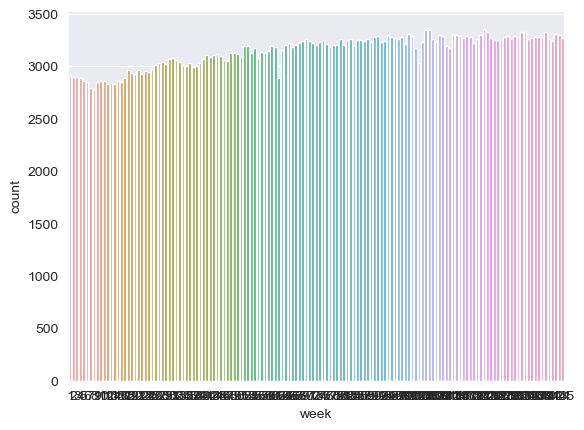

In [41]:
sns.countplot(x="week", data=data)

Looks fine, every week has similar amounts of data.

Let's include in the test set weeks 131-145

In [42]:
train_set = data[data["week"] <= 130]
test_set = data[data["week"] > 130]

# Merging the train into one data frame by joining with the centers and meals

In [43]:
full_train_data = train_set.merge(center_info, on="center_id", how="inner")
full_train_data = full_train_data.merge(meal_info, on="meal_id", how="inner")

In [44]:
full_train_data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407238,1140443,126,61,2104,629.53,630.53,0,0,54,473,77,TYPE_A,4.5,Fish,Continental
407239,1372283,127,61,2104,631.53,630.53,0,0,28,473,77,TYPE_A,4.5,Fish,Continental
407240,1056661,128,61,2104,629.53,631.53,0,0,53,473,77,TYPE_A,4.5,Fish,Continental
407241,1162703,129,61,2104,436.53,629.53,0,1,121,473,77,TYPE_A,4.5,Fish,Continental


# Checking numerical values

In [45]:
full_train_data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.072430e+05,407243.000000,407243.000000,407243.000000,407243.000000,407243.000000,407243.000000,407243.000000,407243.000000,407243.000000,407243.000000,407243.000000
mean,1.249982e+06,67.114241,82.120115,2023.651554,331.265163,353.251941,0.082528,0.110200,264.387889,601.565449,56.607038,4.083209
std,1.443946e+05,37.259672,45.977340,547.367071,153.289316,160.697550,0.275168,0.313139,401.031825,66.212891,17.640190,1.091140
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.000000,13.000000,456.000000,23.000000,0.900000
25%,1.124816e+06,35.000000,43.000000,1558.000000,228.010000,243.500000,0.000000,0.000000,54.000000,553.000000,34.000000,3.600000
50%,1.249941e+06,68.000000,76.000000,1971.000000,292.030000,309.430000,0.000000,0.000000,136.000000,596.000000,56.000000,4.000000
75%,1.375048e+06,99.000000,110.000000,2539.000000,443.350000,459.810000,0.000000,0.000000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,130.000000,186.000000,2956.000000,767.330000,767.330000,1.000000,1.000000,24299.000000,713.000000,93.000000,7.000000


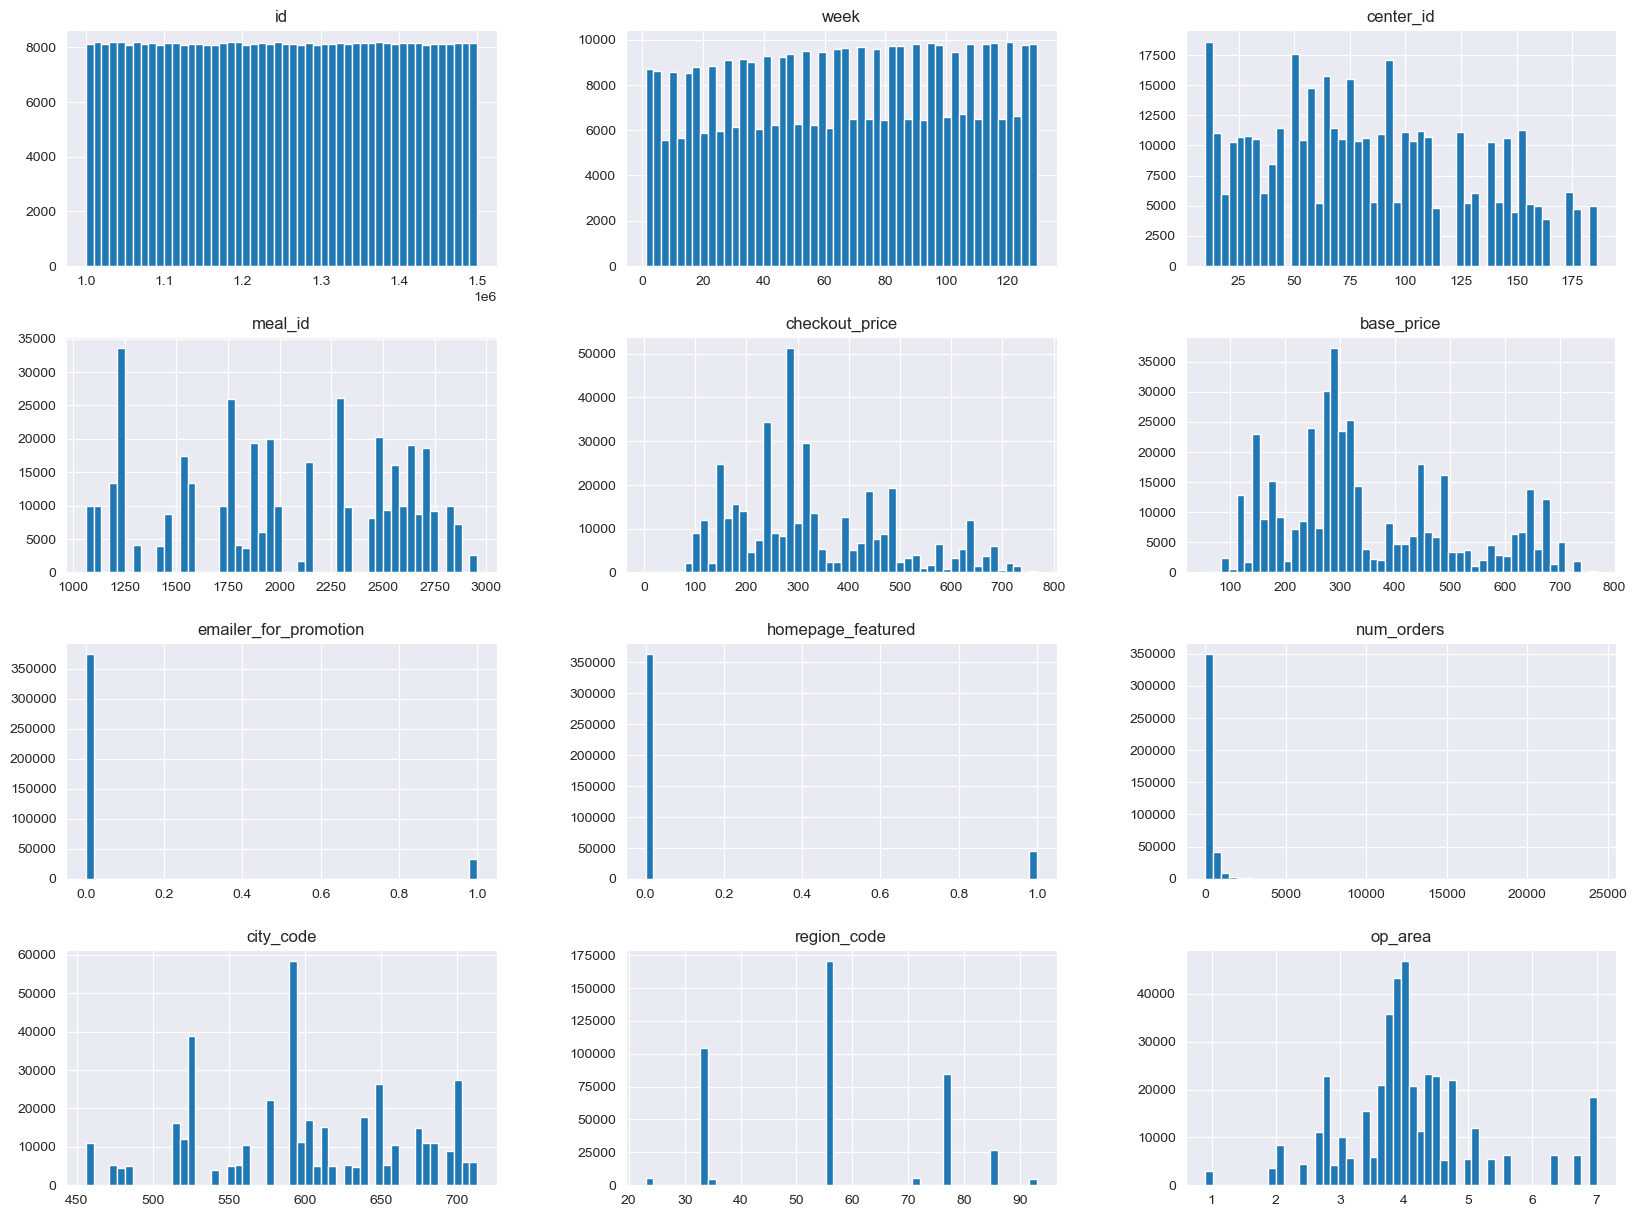

In [46]:
full_train_data.hist(bins=50, figsize=(20, 15))
plt.show()


# Check correlations with number of sales

In [49]:
correlations = full_train_data.corr()

In [50]:
correlations["num_orders"]

id                       0.001325
week                    -0.008712
center_id               -0.051297
meal_id                  0.014951
checkout_price          -0.285968
base_price              -0.223991
emailer_for_promotion    0.282909
homepage_featured        0.299746
num_orders               1.000000
city_code                0.041095
region_code              0.030429
op_area                  0.175178
Name: num_orders, dtype: float64

# Insights:
Highest positive correlations are with homepage_features and emails_for promotion.
Makes sense, if the meal is marketed either on the website or through an email, the nr of orders increases.
Op Area also makes sense. If the center covers a bigger area, the nr of orders increases.

Best negative correlations are for the base_price and the checkout_price.
Self-explanatory,  if prices are cheaper, more orders appear.

array([[<AxesSubplot:xlabel='num_orders', ylabel='num_orders'>,
        <AxesSubplot:xlabel='base_price', ylabel='num_orders'>,
        <AxesSubplot:xlabel='checkout_price', ylabel='num_orders'>],
       [<AxesSubplot:xlabel='num_orders', ylabel='base_price'>,
        <AxesSubplot:xlabel='base_price', ylabel='base_price'>,
        <AxesSubplot:xlabel='checkout_price', ylabel='base_price'>],
       [<AxesSubplot:xlabel='num_orders', ylabel='checkout_price'>,
        <AxesSubplot:xlabel='base_price', ylabel='checkout_price'>,
        <AxesSubplot:xlabel='checkout_price', ylabel='checkout_price'>]],
      dtype=object)

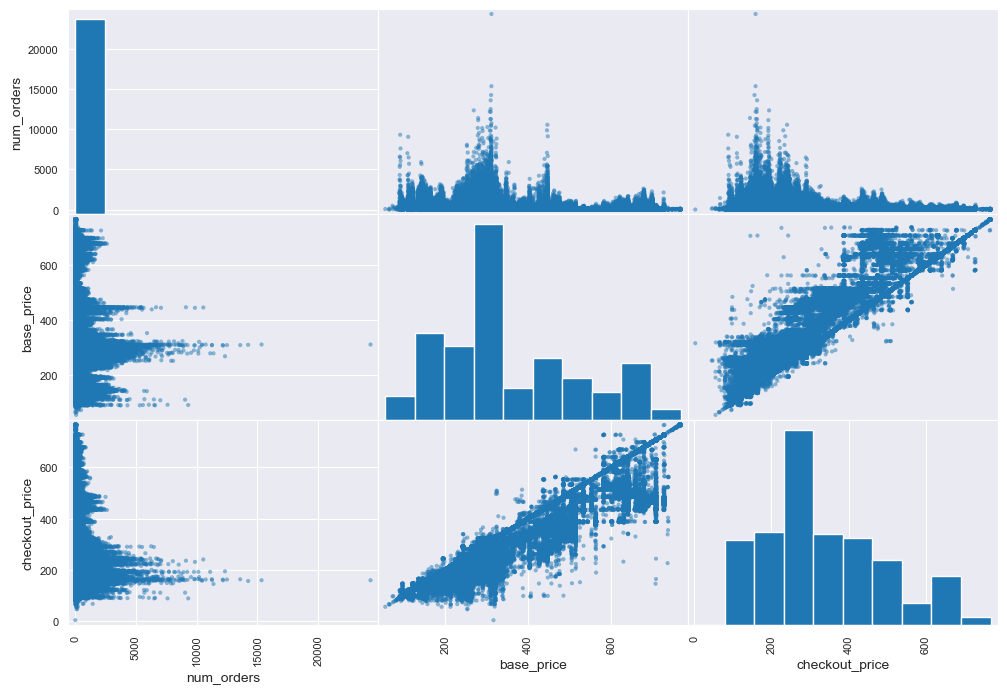

In [51]:
from pandas.plotting import scatter_matrix

attributes = ["num_orders", "base_price", "checkout_price"]
scatter_matrix(full_train_data[attributes], figsize=(12, 8))

In [52]:
nr_order_by_week = full_train_data.groupby(["week"])["num_orders"].sum()
nr_order_by_week

week
1       792261
2       787084
3       695262
4       743529
5      1198675
        ...   
126     810838
127     762737
128     878397
129     843661
130     920019
Name: num_orders, Length: 130, dtype: int64

In [ ]:
#plot the total profit over the years
plt.figure(figsize=(18, 12))
nr_order_by_week.plot(kind='bar')
plt.title('Total Number of Orders By Week')
plt.xlabel('week')
plt.ylabel('num_orders')
plt.xticks(rotation=90)  # text rotation on the x axis
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(18, 12))
nr_order_by_week.plot(kind='line')
plt.title('Total Number of Orders By Week')
plt.xlabel('week')
plt.ylabel('num_orders')
plt.xticks(rotation=90)  # text rotation on the x axis
plt.tight_layout()
plt.show()


In [ ]:
full_train_data.info()


In [ ]:
nr_order_by_center = full_train_data.groupby(["center_id"])["num_orders"].sum()
nr_order_by_center

In [ ]:
plt.figure(figsize=(18, 12))
nr_order_by_center.plot(kind='bar')
plt.title('Total Number of Orders By Center')
plt.xlabel('center_id')
plt.ylabel('num_orders')
plt.xticks(rotation=90)  # text rotation on the x axis
plt.tight_layout()
plt.show()

In [ ]:
nr_order_by_center_type = full_train_data.groupby(["center_type"])["num_orders"].sum()
nr_order_by_center_type

In [ ]:
#plot the total profit over the years
plt.figure(figsize=(18, 12))
nr_order_by_center_type.plot(kind='bar')
plt.title('Total Number of Orders By Center Type')
plt.xlabel('center_type')
plt.ylabel('num_orders')
plt.xticks(rotation=90)  # text rotation on the x axis
plt.tight_layout()
plt.show()


In [ ]:
nr_order_by_op_area = full_train_data.groupby(["op_area"])["num_orders"].sum()
plt.figure(figsize=(18, 12))
nr_order_by_op_area.plot(kind='bar')
plt.title('Total Number of Orders By Op Area')
plt.xlabel('op_area')
plt.ylabel('num_orders')
plt.xticks(rotation=90)  # text rotation on the x axis
plt.tight_layout()
plt.show()

## Type A Centers perform much better than Type B. We'll need to understand why.


In [ ]:
nr_order_by_meal = full_train_data.groupby(["meal_id"])["num_orders"].sum()
plt.figure(figsize=(18, 12))
nr_order_by_meal.plot(kind='line')
plt.title('Total Number of Orders By Meal Id')
plt.xlabel('meal_id')
plt.ylabel('num_orders')
plt.xticks(rotation=90)  # text rotation on the x axis
plt.tight_layout()
plt.show()

In [ ]:
nr_order_by_meal_category = full_train_data.groupby(["category"])["num_orders"].sum()
plt.figure(figsize=(18, 12))
nr_order_by_meal_category.plot(kind='bar')
plt.title('Total Number of Orders By Meal Category')
plt.xlabel('category')
plt.ylabel('num_orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Some categories sell much better than others: Beverages win by a lot, followed by Rice Bowls and Sandwiches

In [ ]:
full_train_data["cuisine"].value_counts()

In [ ]:
nr_order_by_meal_cuisine = full_train_data.groupby(["cuisine"])["num_orders"].sum()
plt.figure(figsize=(18, 12))
nr_order_by_meal_cuisine.plot(kind='bar')
plt.title('Total Number of Orders By Meal Cuisine')
plt.xlabel('cuisine')
plt.ylabel('num_orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Checking some other connections

## Are Type_A centers selling better because of Type_A or because they maybe selling more Beverages or other well selling meal cateogries?

Let's look at the order totals for each center_type/category combination

In [ ]:
full_train_data.groupby(["center_type", "category"])["num_orders"].sum()


Good info, but we need it in a visual way to understand better.
Let's plot these values grouped by center type and category. We expect to see that Type A bars will outperform the rest of the center types because we know Type A sells much more than the others.

In [ ]:
sns.set(rc={'figure.figsize': (16, 12)})
sns.barplot(x="center_type", y="num_orders", hue="category", data=full_train_data, estimator="sum")

OBSERVATIONS:
As we assumed, Type A categories outperform those respective categories from other center types.
Just eyeballing it, we can see that even though Type A sells much more than the others, it sells each category in a similar proportion to the rest.
Eyeballing is not enough, let's check the data.

## Are the percentages of categories sold in Type A very different that in the other types? Does type A sell many more Beverages compared to it's total sales?
## We want to understand if the better performance of Type A is due to it selling meals from a better sold category or if it sells about the same as the other center types in % amount. This will help us understand if the center_type is actually relevant or if the difference in sales for the center_type is due to the meal categories sold.

Basically, we want to calculate the % of sales from the total for each center_type/category combination.
To do this, we first need for each center_type/category combination the total number of orders.

In [ ]:
grouped_data_category = full_train_data.groupby(['center_type', 'category'])['num_orders'].sum().reset_index()
grouped_data_category


No we have the total orders for each center_type/category. To calculate the % we first need to know the total nr of orders sold for each center_type regardless of the categories. We create a different dataset for this.

In [ ]:
total_orders_by_center = full_train_data.groupby(['center_type'])['num_orders'].sum().reset_index()
total_orders_by_center


Perfect. Now we could calculate the percentage going line by line and looking into the above dataset to find the total, but it's more performant to use pandas. For this we need to add to all the center_type/category combinations, the total nr of orders for that center_type.

In [ ]:
grouped_data_category = grouped_data_category.merge(total_orders_by_center, on='center_type', suffixes=('', '_total'))
grouped_data_category


Now that we have everything we need to calculate the percentage in the `grouped_data` dataset, we can use Pandas to apply a "regula de 3 simpla" formula:
`num_orders / num_orders+total * 100`

In [ ]:
grouped_data_category["percentage"] = grouped_data_category["num_orders"] / grouped_data_category[
    "num_orders_total"] * 100


In [ ]:
grouped_data_category


Now, we just need to plot the data

In [ ]:
sns.barplot(x="center_type", y="percentage", hue="category", data=grouped_data_category)


OBSERVATIONS:
Given that the percentages for each category is very similar between the center_types it's safe to assume that category does not have a correlation with the high number of orders sold in Type A, and basically a higher Type like Type A or Type B means that that center will sell more.
So far, center_type seems like a very important feature to include in the ML training.

In [ ]:
full_train_data.info()


# Are Type_A centers selling better because of Type_A or because they all have higher op_area?

Let's check center_type/op_area order totals.

In [ ]:
total_orders_by_center_area = full_train_data.groupby(['center_type', "op_area"])['num_orders'].sum().reset_index()
total_orders_by_center_area


Nothing to understand. Let's plot it.

In [ ]:
sns.set(rc={'figure.figsize': (16, 12)})
sns.barplot(x="center_type", y="num_orders", hue="op_area", data=full_train_data, estimator="sum")


OBSERVATIONS:
TYpe C is the only one that sells from centers with a very small op area.
Type A might sell better because it has a much more even spread of centers with different op-areas, from smallest to largest.
Type C might be selling poorly because it seems it has very few sales from center in range 4.1-5.0, which is a sweet spot and generates a lot of sales for Type A.
In order to understand this better, let's look at the percentage spread for each op_area.

In [ ]:
grouped_data_area = full_train_data.groupby(['center_type', 'op_area'])['num_orders'].sum().reset_index()
grouped_data_area = grouped_data_area.merge(total_orders_by_center, on='center_type', suffixes=('', '_total'))
grouped_data_area["percentage"] = grouped_data_area["num_orders"] / grouped_data_area["num_orders_total"] * 100
sns.barplot(x="center_type", y="percentage", hue="op_area", data=grouped_data_area)


As seen above, Type A has a closer to normal (Gaussian) distribution than Type C, which relies heavily on centers in the 4.0-4.2 area. Might be a reason why sales are smaller in type C.

Only thing worth mentioning is that TYPE_C, the lowest selling one has centers with small op_area(e.g. centers that ship on a very small distance around them)

However, none of these insights are extremely powerful to determine changes in the flow.

Let's check if each center_type have the same distribution of op_area. We're curious to see if maybe TYPE_C have a lot of small op_area centers and if that's the reason its sales are lower or other reasons.

In [ ]:
sns.countplot(x="center_type", hue="op_area", data=full_train_data)

OBSERVATIONS:
Comparing the count of op_area chart with the number of orders/% for each op, we can see that the sales generated by each op_area are directly proportional to the numbers of centers with that op_area. Makes perfect sense.
In conclusion, we cannot say that Type C means that it includes only centers with a specific op_area range or other assumptions like this.
We do not see any connection between op_area and center type at the moment, meaning that until further analysis both of these features are relevant for training.


Let's bin the op_area to work easily with it and check if we see anything else.

In [ ]:
sns.barplot(x="op_area", y="num_orders", data=full_train_data, estimator="sum")

In [ ]:
full_train_data['op_area_bin'] = pd.cut(full_train_data['op_area'], [0, 2.4, 3.7, 4.5, 5.1, 6.7, np.inf],
                                        labels=['XS', 'S', 'M', 'L', 'XL', 'XXL'])


In [ ]:
sns.barplot(x="op_area_bin", y="num_orders", data=full_train_data, estimator="sum")

In [ ]:
sns.countplot(x="center_type", hue="op_area_bin", data=full_train_data)


In [ ]:
grouped_data_area_bin = full_train_data.groupby(['center_type', 'op_area_bin'])['num_orders'].sum().reset_index()
grouped_data_area_bin = grouped_data_area_bin.merge(total_orders_by_center, on='center_type', suffixes=('', '_total'))
grouped_data_area_bin["percentage"] = grouped_data_area_bin["num_orders"] / grouped_data_area_bin[
    "num_orders_total"] * 100
sns.barplot(x="center_type", y="percentage", hue="op_area_bin", data=grouped_data_area_bin)


In [ ]:
op_area_bin_encoded = pd.get_dummies(full_train_data['op_area_bin'], prefix='op_area')
op_area_bin_encoded


In [ ]:
full_train_data = pd.concat([full_train_data, op_area_bin_encoded], axis=1)

In [ ]:
full_train_data


In [ ]:
new_corrs = full_train_data.corr()
new_corrs['num_orders']


Binning the op_area did not give additional insights. Compared to the number of centers in each type all have similar spread of small/medium/large op_areas.

Looking at the correlations of a bin or one hot encoded values with the target is not valid as it will show a linear correlation only (how well it goes up or down with the target). However, a low linear correlation does not mean the bin or encoding is bad. It might still give better results in the ML training if it simplifies the process for the algorithm without losing too much data.

We should test ML results with the bin or without it. We should also test with a smaller bin size. A larger bin size means losing more data and finesse.

# Let's look at data related to cuisine and category. Which cuisine falls in which category and other things here

In [ ]:
sns.barplot(x="category", y="num_orders", hue="cuisine", data=full_train_data, estimator="sum")

In [ ]:
sns.countplot(x="category", hue="cuisine", data=full_train_data)


In [ ]:
full_train_data["category_cuisine"] = full_train_data['category'] + "-" + full_train_data['cuisine']
sns.countplot(x="category", hue="category_cuisine", data=full_train_data)

OBSERVATIONS:
By looking at the cuisine/category, we can see we only have 4 cuisines.
Beverages category is the only category that has meals from every cuisine.
The rest of the categories only have means from a single cuisine (Pasta category on contains Italian meals, logically).
The cuisine diversity of the beverages category clearly is a factor in the increased sales of beverages as it tells us that almost all centers have beverages regardless of cuisine speciality. However, if a center sells only italian food it will sell Pasta and only other italian things.

## Let's check the center type/cuisine connection. We want to understand if certain center or center Types specialize in a cuisine

In [ ]:
full_train_data.groupby(["center_id", "cuisine"])["num_orders"].sum()


It is clear from the above, that individual centers do NOT have a speciality. Each center sells food from all the 4 cuisines.
Let's check if there's any relation with center type, although I don't expect there to be one, and we believe we'll see the same thing

In [ ]:
full_train_data.groupby(["center_type", "cuisine"])["num_orders"].sum()


In [ ]:
sns.barplot(x="center_type", y="num_orders", hue="cuisine", data=full_train_data, estimator="sum")


In [ ]:
grouped_data_cuisine = full_train_data.groupby(['center_type', 'cuisine'])['num_orders'].sum().reset_index()
grouped_data_cuisine = grouped_data_cuisine.merge(total_orders_by_center, on='center_type', suffixes=('', '_total'))
grouped_data_cuisine["percentage"] = grouped_data_cuisine["num_orders"] / grouped_data_cuisine["num_orders_total"] * 100
sns.barplot(x="center_type", y="percentage", hue="cuisine", data=grouped_data_cuisine)


In [ ]:
grouped_data_cuisine_cat = full_train_data.groupby(['center_type', 'category_cuisine'])[
    'num_orders'].sum().reset_index()
grouped_data_cuisine_cat = grouped_data_cuisine_cat.merge(total_orders_by_center, on='center_type',
                                                          suffixes=('', '_total'))
grouped_data_cuisine_cat["percentage"] = grouped_data_cuisine_cat["num_orders"] / grouped_data_cuisine_cat[
    "num_orders_total"] * 100
sns.barplot(x="center_type", y="percentage", hue="category_cuisine", data=grouped_data_cuisine_cat)

OBSERVATIONS:
When looking at nr of orders, Type A and B are very similar in distribution, however Type C is the outlier.
Compared to the other, Type C sells less Thai meals that the other center types. The reason for this might be location based or preference based. We can also see from an above chart that Type C sells less from Thai specific categories, notably, Type C sells less Thai Beverages, Extras, Other snacks and Starters. However, # of thai soups are fine in Type C.

The created feature category_cuisine should be checked in ML training to see if it gives better results.

# How price impacts the num_orders. Try binning that as well. Investigate price patterns compared to other features (center type, category, cuisine). Only do these if they're relevant or answer a specific business question.
EX: Are the prices in Type A center higher than type B or C? Does that mean that Type A are "luxury" centers?

In [ ]:
plt.figure(figsize=(18, 12))
sns.barplot(x='center_type', y='checkout_price', data=full_train_data)
plt.title('Checkout Price vs. Center Types')
plt.xlabel('Center Types')
plt.ylabel('Checkout Price')
plt.tight_layout()
plt.show()


#### These average prices per center types do not really vary, they are close to each other, between 320-350.
### Let's see these averages by categories too.


In [ ]:
mean_prices = full_train_data.groupby(['center_type', 'category'])['checkout_price'].mean().reset_index()
# Pivot the data to have center types as columns and categories as rows
pivot_table = mean_prices.pivot_table(index='category', columns='center_type', values='checkout_price')

plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='checkout_price', hue='center_type', data=mean_prices)
plt.title('Mean Checkout Price by Category and Center Type')
plt.xlabel('Category')
plt.ylabel('Mean Checkout Price')

plt.tight_layout()
plt.legend(title='Center Type')

plt.show()

##### As the averages by types showed that they are similar, the same this is shown here, by categories. Each type center sells each product with almost the same average price. Foods like Seafood, Fish and Pizza are the most expensive categories, while the Soups, Beverages and Extras as the least expensive.

###### Let's see the minimum/maximum checkout price for each center type.

In [ ]:
#max price for each center type
max_prices = full_train_data.groupby('center_type')['checkout_price'].max()

#min price for each center type
min_prices = full_train_data.groupby('center_type')['checkout_price'].min()

max_prices, min_prices

#### The maximum checkout prices are close to each other, only Type A has a higher one, while on the other hand, looking at the minimum prices, Type A has a very low lowest price, compared to B and C.  This means that center type A which sells the most and have the most centers does not mean that it also have very expensive products compared to types B and C.

#### Maybe seeing the frequency of the checkout prices split into bins can give us relevant info.

In [ ]:
# Separate data by type
type_a_data = full_train_data[full_train_data['center_type'] == 'TYPE_A']
type_b_data = full_train_data[full_train_data['center_type'] == 'TYPE_B']
type_c_data = full_train_data[full_train_data['center_type'] == 'TYPE_C']

# Create histograms for each type
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.hist(type_a_data['checkout_price'], bins=15, color='blue', alpha=0.5, label='Type A', edgecolor='black')
plt.hist(type_b_data['checkout_price'], bins=15, color='green', alpha=0.5, label='Type B', edgecolor='black')
plt.hist(type_c_data['checkout_price'], bins=15, color='red', alpha=0.5, label='Type C', edgecolor='black')

plt.title('Checkout Price Distribution by Type')
plt.xlabel('Checkout Price')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.xticks(range(0, 900, 50))
plt.show()

#### This plot can show the frequency of the checkout prices and how they are spread along the three types of centers and as we already know, type A sells most and have most center, therefore it has the highest frequency. Although, all three centers have a similar structure, Types B and C are almost identical, but the "shape" is similar. The highest peaks for all are encountered at prices between 250-350. There is a tendency for the center types to sell products with smaller price (till 350), rather than the ones from 400 and so on.

### Let's see all the previous plots, but for the base price. In this way, we can follow up if there are trends for ordering more when certain discounts are applied or products are promoted via email/webpage.

In [ ]:
plt.figure(figsize=(18, 12))
sns.barplot(x='center_type', y='base_price', data=full_train_data)
plt.title('Base Price vs. Center Types')
plt.xlabel('Center Types')
plt.ylabel('Base Price')
plt.tight_layout()
plt.show()


#### The situation is similar to the checkout price plot, where Type B has the highest base price, followed by Type A and Type C, but all three of them are close, being situated between 340 and 360. (this range for checkout price was 320-250)

### Averages by categories:

In [ ]:
mean_prices = full_train_data.groupby(['center_type', 'category'])['base_price'].mean().reset_index()
# Pivot the data to have center types as columns and categories as rows
pivot_table = mean_prices.pivot_table(index='category', columns='center_type', values='base_price')

plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='base_price', hue='center_type', data=mean_prices)
plt.title('Mean Base Price by Category and Center Type')
plt.xlabel('Category')
plt.ylabel('Mean Base Price')

plt.tight_layout()
plt.legend(title='Center Type')

plt.show()

##### Again, these bars are similar to the ones created for checkout prices, the only thing to be mentioned here would be that pizza seems to have a higher discount than the other categories, because it has the highest difference between the checkout price and base price.

### Here are the minimum/maximum prices for base prices, for each type of center:

In [ ]:
#max price for each center type
max_prices = full_train_data.groupby('center_type')['base_price'].max()

#min price for each center type
min_prices = full_train_data.groupby('center_type')['base_price'].min()

max_prices, min_prices

#####   So, the maximum prices are identical to the ones for checkout price, but the minimum checkout prices are way different from the minimum base prices:   Checkout_price_ Type A = 2.97   and  Base_price_Type A = 65.02  (biggest discounts, wow, maybe Type A give the best discounts, we should definitely investigate that), Checkout_price_Type B = 53.41 and Base_price_Type B = 84.39 (again, here it can be observed that it offers big discounts), Checkout_price_Type C = 55.35 and Base_price_Type C = 45.62 (smaller price difference)

### Let's create a new column to compare the checkout price to the base price, and if the checkout price is smaller, it means that there is a discount applied. 

In [ ]:
full_train_data['is_discount'] = (full_train_data['checkout_price'] < full_train_data['base_price']).astype(int)

In [ ]:
full_train_data

##### How many values have discounts?  

In [ ]:
full_train_data['is_discount'].value_counts()

#### 50% of them have discounts!

##### But how are they distributed along center types? 

In [ ]:
grouped_data = full_train_data.groupby(['center_type', 'is_discount']).size().unstack(fill_value=0)

ax = grouped_data.plot(kind='bar', figsize=(8, 6), stacked=True, color=['lightskyblue', 'lightcoral'])
plt.title('Distribution of Price Comparison by Type')
plt.xlabel('Center Type')
plt.ylabel('Count')
plt.legend(['is_discount 0', 'is_discount 1'])
plt.tight_layout()
plt.show()

#### Looks like they all have about 50% discounts and 50% without discounts, at different scales, becauze A sells the most and have the most number of center.

In [ ]:
percentages = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

ax = percentages.plot(kind='bar', figsize=(8, 6), stacked=True, color=['lightskyblue', 'lightcoral'])

plt.title('Percentage Distribution of is_discount by Type')
plt.xlabel('Center Type')
plt.ylabel('Percentage')
plt.legend(['is_discount 0', 'is_discount 1'], loc='upper right')

plt.tight_layout()
plt.show()

##### Analyzing the percentages, they are similar, around 50% discount, 50% non-discount for all center types. Let's see what is the average discount per center type by first introducing a new column in the dataset that calculates the difference between base price and checkout price, then where this difference is positive, or when is_discount column is equal to one, the data is grouped and mean() function applied.

In [ ]:
full_train_data['discount_value'] = full_train_data['base_price'] - full_train_data['checkout_price']


In [ ]:
full_train_data

In [ ]:
average_discount_by_type = full_train_data[full_train_data['is_discount'] == 1].groupby('center_type')[
    'discount_value'].mean()

In [ ]:
average_discount_by_type

##### Again, nothing very special, Type A did not give higher discounts than the other two center types, they are similar. 

### Let's analyze the emailer_for_promotion and homepage_featured, maybe we can find interesting insights related to them.

In [ ]:
full_train_data['emailer_for_promotion'].value_counts()

In [ ]:
full_train_data['homepage_featured'].value_counts()

#### We observed earlier that ~50% of the total orders have discounts. Now, 8% were promoted via email and almost 11% on homepage.

In [ ]:
promotion_email = full_train_data[(full_train_data['emailer_for_promotion'] == 1)].groupby(['center_type'])[
    'is_discount'].count()

In [ ]:
promotion_email

In [ ]:
promotion_homepage = full_train_data[(full_train_data['homepage_featured'] == 1)].groupby(['center_type'])[
    'is_discount'].count()

In [ ]:
promotion_homepage

##### Looks like Type A is more promoted via email and homepage than the others. It's like 3x more promoted. Maybe it has to do with the fact that there are more centers? 

In [ ]:
promotion_email = full_train_data[(full_train_data['is_discount']) == 1 & (full_train_data['emailer_for_promotion'] == 1)].groupby(
        ['center_type'])['discount_value'].count()

In [ ]:
promotion_email

####  Is there an effect of Email Promotions on  nr of orders? We have to calculate the average number of orders for items that were promoted through email ("emailer_for_promotion" = 1) compared to items that were not and to take conclusions about the volumes on days when emails were sent compared to when they are not.


In [ ]:
average_orders_with_promotion = full_train_data[full_train_data['emailer_for_promotion'] == 1]['num_orders'].mean()
average_orders_without_promotion = full_train_data[full_train_data['emailer_for_promotion'] == 0]['num_orders'].mean()

print("Average Orders with Email Promotion:", average_orders_with_promotion)
print("Average Orders without Email Promotion:", average_orders_without_promotion)

In [ ]:
labels = ['With Promotion', 'Without Promotion']
average_orders = [average_orders_with_promotion, average_orders_without_promotion]
plt.figure(figsize=(6, 4))
plt.bar(labels, average_orders, color=['green', 'red'])
plt.title('Average Orders with and without Email Promotion')
plt.xlabel('Promotion Status')
plt.ylabel('Average Orders')
plt.show()

##### Interesting, we can clearly tell that the emails with promotions did a great job by generating a triple number of orders! 

#### But what is the effect of Homepage Featured on nr of orders? We have to calculate the average number of orders for items that were featured on the homepage ("homepage_featured" = 1) compared to items that were not and analyze whether featuring items on the homepage influences customers to order more.

In [ ]:
# Calculate the average number of orders for homepage featured items and non-featured items
average_orders_featured = full_train_data[full_train_data['homepage_featured'] == 1]['num_orders'].mean()
average_orders_non_featured = full_train_data[full_train_data['homepage_featured'] == 0]['num_orders'].mean()

print("Average Orders with Homepage Featured Items:", average_orders_featured)
print("Average Orders without Homepage Featured Items:", average_orders_non_featured)

In [ ]:
labels = ['Is Homepage Featured', 'Is not Homepage Featured']
average_orders = [average_orders_featured, average_orders_non_featured]
plt.figure(figsize=(6, 4))
plt.bar(labels, average_orders, color=['green', 'red'])
plt.title('Average Orders that are/are not Homepage Featured')
plt.xlabel('Homepage Feature Status')
plt.ylabel('Average Orders')
plt.show()

##### Hmm, again, almost 3x more orders with homepage featured, just like email promotions. 

### Let's create a more visual plot to see different combinations:
- email + homepage
- only email, not homepage
- not email, only homepage
- none

In [ ]:
average_orders_with_email_promo_and_featured = \
    full_train_data[(full_train_data['emailer_for_promotion'] == 1) & (full_train_data['homepage_featured'] == 1)][
        'num_orders'].mean()
average_orders_with_email_promo_only = \
    full_train_data[(full_train_data['emailer_for_promotion'] == 1) & (full_train_data['homepage_featured'] == 0)][
        'num_orders'].mean()
average_orders_with_featured_only = \
    full_train_data[(full_train_data['emailer_for_promotion'] == 0) & (full_train_data['homepage_featured'] == 1)][
        'num_orders'].mean()
average_orders_without_promo_or_featured = \
    full_train_data[(full_train_data['emailer_for_promotion'] == 0) & (full_train_data['homepage_featured'] == 0)][
        'num_orders'].mean()

labels = ['Email Promo & Featured', 'Email Promo Only', 'Featured Only', 'No Promo or Featured']

average_orders = [average_orders_with_email_promo_and_featured, average_orders_with_email_promo_only,
                  average_orders_with_featured_only, average_orders_without_promo_or_featured]

plt.figure(figsize=(10, 6))
plt.bar(labels, average_orders, color=['blue', 'cyan', 'cornflowerblue', 'slateblue'])
plt.title('Average Orders for Different Combinations of Email Promotion and Homepage Featured Items')
plt.xlabel('Combinations')
plt.ylabel('Average Orders')
plt.show()

#### Emails and being Homepage Featured bring the most number of orders. Without being promoted, orders are not generated so much as having at least email or homepage featured. In the following scenarios, the discounts will be analyzed. 

### Are promoted items more likely to have discounts? How are the checkout prices spread here? Are the items with big discounts cheap? We will investigate whether email promotions or homepage featured items correlate with specific discount levels and checkout price ranges. 

In [ ]:
# Create labels for different scenarios
scenario_labels = []

for email_promo in [0, 1]:
    for homepage_featured in [0, 1]:
        scenario_labels.append(f"Email Promo: {email_promo}, Featured: {homepage_featured}")

In [ ]:
scenario_labels

In [ ]:
average_checkout_prices = []
average_discounts = []

for email_promo in [0, 1]:
    for homepage_featured in [0, 1]:
        average_checkout_price = full_train_data[(full_train_data['emailer_for_promotion'] == email_promo) & (
                full_train_data['homepage_featured'] == homepage_featured)]['checkout_price'].mean()
        average_discount = full_train_data[(full_train_data['emailer_for_promotion'] == email_promo) & (
                full_train_data['homepage_featured'] == homepage_featured)]['discount_value'].mean()
        average_checkout_prices.append(average_checkout_price)
        average_discounts.append(average_discount)

In [ ]:
average_checkout_prices

In [ ]:
average_discounts

#### Let's plot these!

In [ ]:
plt.figure(figsize=(10, 4))
plt.bar([label + " (Price)" for label in scenario_labels], average_checkout_prices, color='rebeccapurple', alpha=0.6,
        label='Avg. Checkout Price')
plt.bar([label + " (Discount)" for label in scenario_labels], average_discounts, color='mediumpurple', alpha=0.6,
        label='Avg. Discount Amount')

plt.title('Average Checkout Prices and Discounts for Different Scenarios')
plt.xlabel('Scenarios')
plt.ylabel('Amount')
plt.legend(loc='upper right')
plt.tight_layout()
plt.xticks(rotation=45, ha="right")
plt.show()

#### OBSERVATIONS:
- Products that have no promotion have a high average checkout price and a small discount amount,
- Products that are promoted via email have the lowest average checkout price and a higher discount,
- Products that are promoted via homepage have a bit higher price and also higher discounts,
- Products that are promoted both ways are having the highest checkout price and the highest discounts

In [ ]:
grouped_data = full_train_data.groupby(['week', 'emailer_for_promotion', 'homepage_featured'])[
    'num_orders'].mean().reset_index()

plt.figure(figsize=(12, 8))

for email_promo in [0, 1]:
    for homepage_featured in [0, 1]:
        scenario_data = grouped_data[(grouped_data['emailer_for_promotion'] == email_promo) & (
                grouped_data['homepage_featured'] == homepage_featured)]
        plt.plot(scenario_data['week'], scenario_data['num_orders'],
                 label=f'Email Promo: {email_promo}, Featured: {homepage_featured}')

plt.title('Average Order Trends Over Time for Different Promotion Scenarios')
plt.xlabel('Week')
plt.ylabel('Average Number of Orders')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
full_train_data.info()

# Let's build a pipeline that does all the necessary transformations and prepare the dataset for training!

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin


class FoodDataMerger(BaseEstimator, TransformerMixin):
    center_info = None
    meal_info = None

    def __init__(self, center_info, meal_info):
        self.center_info = center_info
        self.meal_info = meal_info

    def fit(self, data):
        return self

    def transform(self, data):
        merged_data = data.merge(self.center_info, on="center_id", how="inner", sort=False)
        merged_data = merged_data.merge(self.meal_info, on="meal_id", how="inner", sort=False)
        return merged_data


class FeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        new_data = X.copy()

        new_data['op_area_bin'] = pd.cut(new_data['op_area'], [0, 2.4, 3.7, 4.5, 5.1, 6.7, np.inf],
                                         labels=['XS', 'S', 'M', 'L', 'XL', 'XXL'])

        new_data['checkout_price_bin'] = pd.cut(new_data['checkout_price'], [0, 100, 250, 350, 520, np.inf],
                                                labels=['Very Cheap', 'Cheap', 'Medium', 'Expensive', 'Luxury'])

        new_data['base_price_bin'] = pd.cut(new_data['base_price'], [0, 100, 250, 350, 520, np.inf],
                                            labels=['Very Cheap', 'Cheap', 'Medium', 'Expensive', 'Luxury'])

        new_data["category_cuisine"] = new_data['category'] + "-" + new_data['cuisine']

        new_data["region_city"] = new_data['region_code'].astype(str) + "-" + new_data['city_code'].astype(str)

        new_data['is_discount'] = (new_data['checkout_price'] <= new_data['base_price']).astype(int)

        new_data['discount_value'] = new_data.apply(
            lambda row: row['base_price'] - row['checkout_price'] if row['checkout_price'] <= row['base_price'] else 0,
            axis=1)

        return new_data


class DataFrameReconstructor(BaseEstimator, TransformerMixin):
    pipeline = None

    def __init__(self, pipeline):
        self.pipeline = pipeline

    def fit(self, data):
        return self

    def transform(self, data):
        return pd.DataFrame(data, columns=self.pipeline.get_feature_names_out())


class FeatureSelector(BaseEstimator, TransformerMixin):
    feature_list = None

    def __init__(self, feature_list):
        self.feature_list = feature_list

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.feature_list]


class PipelineBuilder:
    median_attribs = None
    most_freq_attribs = None
    standard_scaling_attribs = None
    normalization_attribs = None
    selected_features = None
    one_hot_attribs = None
    include_one_hot = True

    def __init__(self, median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                 selected_features, one_hot_attribs, include_one_hot = True):
        self.median_attribs = median_attribs
        self.most_freq_attribs = most_freq_attribs
        self.standard_scaling_attribs = standard_scaling_attribs
        self.normalization_attribs = normalization_attribs
        self.selected_features = selected_features
        self.one_hot_attribs = one_hot_attribs
        self.include_one_hot = include_one_hot

    def build(self):
        fill_missing_pipeline = ColumnTransformer(
            transformers=[
                ('num', SimpleImputer(strategy="median"), self.median_attribs),
                ('cat', SimpleImputer(strategy="most_frequent"), self.most_freq_attribs)
            ],
            remainder='passthrough',
            verbose_feature_names_out=False)

        scaling_pipeline = ColumnTransformer(
            transformers=[
                ('standard', StandardScaler(), self.standard_scaling_attribs),
                ('normalization', MinMaxScaler(), self.normalization_attribs)
            ],
            remainder='passthrough',
            verbose_feature_names_out=False)

        one_hot_pipeline = ColumnTransformer(
            transformers=[
                ('one-hot', OneHotEncoder(), self.one_hot_attribs)
            ],
            remainder='passthrough',
            verbose_feature_names_out=False)

        if self.include_one_hot:
            return Pipeline([
                ('merger', FoodDataMerger(center_info, meal_info)),
                ('missing_data_filler', fill_missing_pipeline),
                ('missing_reconstructor', DataFrameReconstructor(fill_missing_pipeline)),
                ('feature_adder', FeatureAdder()),
                ('scaler', scaling_pipeline),
                ('scaler_reconstructor', DataFrameReconstructor(scaling_pipeline)),
                ('feature_selector', FeatureSelector(self.selected_features)),
                ('one_hot_encoding', one_hot_pipeline)
            ])
        else:
            return Pipeline([
                ('merger', FoodDataMerger(center_info, meal_info)),
                ('missing_data_filler', fill_missing_pipeline),
                ('missing_reconstructor', DataFrameReconstructor(fill_missing_pipeline)),
                ('feature_adder', FeatureAdder()),
                ('scaler', scaling_pipeline),
                ('scaler_reconstructor', DataFrameReconstructor(scaling_pipeline)),
                ('feature_selector', FeatureSelector(self.selected_features))

            ])

In [ ]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price_bin', 'base_price_bin', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']
#one-hot column

one_hot_attribs = ['center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                   'center_type', 'checkout_price_bin', 'base_price_bin']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

# Let's shortlist a few models to find the best performing ones

In [ ]:
sorted_train_data = train_set.sort_values(by='id', ascending=True)
final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())
    print("CV %:", (scores.std() / scores.mean()) * 100)

## Linear Regression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg_scores = cross_val_score(lin_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_reg_scores)
display_scores(lin_rmse_scores)



In [ ]:
lin_reg.fit(final_train_data, final_train_labels)

predictions = lin_reg.predict(final_train_data)

plt.figure(figsize=(17, 8))

plt.rcParams['agg.path.chunksize'] = 20000
plt.plot(final_train_labels.reset_index(drop=True), label="actual")
plt.plot(predictions, color='red', label="predicted")
plt.legend(loc='best')
#pyplot.plot(predictions, color='red')
plt.show()


# XGB Regressor

In [ ]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)

In [ ]:
from xgboost import plot_importance

xgb_reg.fit(final_train_data, final_train_labels)

plot_importance(xgb_reg, max_num_features=10)

In [ ]:
predictions = xgb_reg.predict(final_train_data)

In [ ]:
plt.figure(figsize=(17, 8))

plt.rcParams['agg.path.chunksize'] = 20000
plt.plot(final_train_labels.reset_index(drop=True), label="actual")
plt.plot(predictions, color='red', label="predicted")
plt.legend(loc='best')
#pyplot.plot(predictions, color='red')
plt.show()


# Feature selection

There needs to be a discussion related to how to compare 2 different models in order to determine which is best.
We are calculating the RMSE for all of them. Should we look only at the mean of the score? Should we consider the Standard Deviation?
If we need to look at both is Coefficient of Variation a good metric?
In this situation, we will rely more on the Mean value, as long as the CV % does not get incredibly high.
We will be mainly using the CV% score when deciding between 2 models with very similar mean and STD.

Given the business need a less than 5% CV is acceptable to us.

## Keeping checkout and base prices instead of their bins

In [ ]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'op_area_bin', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


OBSERVATION: Using actual prices is better than using the price bins overall

## Checking if using op_area value instead on bins is better. Keeping only better versions as we go

In [ ]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


OBS: Using actual value of op_area is better than the bins but it's weird. Mean is lower but SD is higher. However, mean reduction if mor important for us and SD is still under 5%

## Checking if using the category and cuisine separately instead of the combined category_cuisine

In [ ]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category', 'cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


OBS: category_cuisine seems to be very similar instead of separate. Separately it results in a slightly higher Mean but a better SD and CV%. IN close situations we will look at the CV%. We will keep them separate.

## Checking if discount features added are actually helping or not

In [ ]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category', 'cuisine',
                     'center_type', 'checkout_price', 'base_price',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


OBS: Engineered features discount_value and is_discount do not seem to help. Let's check them individually.

## Do both discount features help, or is only one better?
Testing with only discount_value

In [ ]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category', 'cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)

Testing with only is_discount

In [ ]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category', 'cuisine',
                     'center_type', 'checkout_price', 'base_price', 'is_discount',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)

OBS: discount features do not help. We will remove them

## Checking if meal_id helps or not

In [ ]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'op_area', 'city_code', 'region_code', 'category', 'cuisine',
                     'center_type', 'checkout_price', 'base_price',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'city_code', 'region_code', 'category', 'cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)

OBS: Removing the meal_id is much worse due to high mean increase.

## Keeping meal id, but not doing 1-hot

In [ ]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category', 'cuisine',
                     'center_type', 'checkout_price', 'base_price',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'city_code', 'region_code', 'category', 'cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)

OBS: Removing the 1-hot enc from meal-id made it worse. We will keep meal id and the 1 hot enc on it.

## Is center id relevant?

In [ ]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'meal_id', 'op_area', 'city_code', 'region_code', 'category', 'cuisine',
                     'center_type', 'checkout_price', 'base_price',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['meal_id', 'city_code', 'region_code', 'category', 'cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)

OBS: Worse without the center ID

## Is performance better without 1-hot enc on center ID?

In [ ]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category', 'cuisine',
                     'center_type', 'checkout_price', 'base_price',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['meal_id', 'city_code', 'region_code', 'category', 'cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)

OBS: Removing 1-hot enc from center ID lowered the mean by increased the SD. Selecting based on lower CV% to keep encoding. 1-hot enc the center ID is logically correct. We will be keeping it.
It is the expected result based on our assumptions as the meal id and center id are categorical attributes where the actual number on the IDs is not relevant. It is only a unique identifier

## Is city code relevant?

In [ ]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'region_code', 'category', 'cuisine',
                     'center_type', 'checkout_price', 'base_price',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'region_code', 'category', 'cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)

OBS: removing the city code seems slightly better. However, the data is relevant and we should keep it.

## Is removing the 1 hot enc from city code better?

In [ ]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category', 'cuisine',
                     'center_type', 'checkout_price', 'base_price',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'region_code', 'category', 'cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)

OBS: removing 1 hot enc makes it worse. Keeping it as originally intended.

## Is region code relevant?

In [ ]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'category', 'cuisine',
                     'center_type', 'checkout_price', 'base_price',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'category', 'cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)

OBS: Removing it is worse

## Is removing the 1 hot enc from region code better?

In [ ]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category', 'cuisine',
                     'center_type', 'checkout_price', 'base_price',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'category', 'cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)

OBS: removing 1 hot encoding from region code made it worse

## Does week normalization help?

In [ ]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category', 'cuisine',
                     'center_type', 'checkout_price', 'base_price',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)

OBS: Normalization of the week was a correct decision. We normalized because we wanted to preserve the distribution but look in a smaller range.

## Will scaling week instead of normalizing it be better?

In [ ]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value', 'week']
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)

OBS: As expected, week should be normalized instead of scaled. Week is an increasing value where the distance between a value and the one before it is important and the same. We want to keep it as it is but just work with smaller values.

## Will normalizing op_area instead of scaling it be better?

In [ ]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'discount_value']
normalization_attribs = ['week', 'op_area']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)

OBS: As expected, normalizing op-area instead of scaling it resulted in worse score. This is because we want the op_area to be on the same scale as the other numerical attributes like the prices.

## Is normalizing the price features better than scaling them?

In [ ]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['op_area']
normalization_attribs = ['week', 'checkout_price', 'base_price', 'discount_value']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


OBS: Normalizing the prices is worse. This is because they will work on a different scale than other relevant training features like the op_area.

## Is scaling and normalization actually helping?

In [ ]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = []
normalization_attribs = []
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


OBS: It's worse. It's because we have numerical attributes that represent different scales(e.g feature 1: 0 - 50000 and feature 2: 0 - 5). Leaving them as is will let the model learn that feature 1 is much more important than feature 2 only because its scale is larger. But both features are equally important.

## Is using the engineered feature region_city better than the 2 separate features?

In [ ]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'region_city', 'category_cuisine',
                     'center_type', 'checkout_price', 'base_price', 'discount_value',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'region_city', 'category_cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


OBS: Much worse, we will be keeping region and city separately

# Final Feature version before HyperParameter tuning

In [ ]:
#imputer columns
median_attribs = ['checkout_price', 'base_price', 'op_area']
most_freq_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine', 'center_type', 'week']
#standardization columns
standard_scaling_attribs = ['checkout_price', 'base_price', 'op_area', 'discount_value']
normalization_attribs = ['week']
#selected columns
selected_features = ['week', 'center_id', 'meal_id', 'op_area', 'city_code', 'region_code', 'category', 'cuisine',
                     'center_type', 'checkout_price', 'base_price',
                     'emailer_for_promotion', 'homepage_featured']

#one-hot column
one_hot_attribs = ['center_id', 'meal_id', 'city_code', 'region_code', 'category', 'cuisine',
                   'center_type']

final_pipeline = PipelineBuilder(median_attribs, most_freq_attribs, standard_scaling_attribs, normalization_attribs,
                                 selected_features, one_hot_attribs).build()

final_train_data = final_pipeline.fit_transform(sorted_train_data)
final_train_labels = sorted_train_data['num_orders'].copy()

xgb_reg = XGBRegressor(random_state=42)

xgb_reg_scores = cross_val_score(xgb_reg, final_train_data, final_train_labels, scoring="neg_mean_squared_error", cv=10,
                                 verbose=3)
xgb_reg_rmse_scores = np.sqrt(-xgb_reg_scores)
display_scores(xgb_reg_rmse_scores)


In [ ]:
xgb_reg.fit(final_train_data, final_train_labels)
predictions = xgb_reg.predict(final_train_data)

plt.figure(figsize=(17, 8))

plt.rcParams['agg.path.chunksize'] = 20000
plt.plot(final_train_labels.reset_index(drop=True), label="actual")
plt.plot(predictions, color='red', label="predicted")
plt.legend(loc='best')
#pyplot.plot(predictions, color='red')
plt.show()


# Fine-Tuning the Model

In [ ]:
# TODO

final_xgb_reg = XGBRegressor(random_state=42)
final_xgb_reg.fit(final_train_data, final_train_labels)

# Checking performance on the test set

In [ ]:
from sklearn.metrics import mean_squared_error

sorted_test_data = test_set.sort_values(by='id', ascending=True)
final_test_data = final_pipeline.fit_transform(sorted_test_data)
final_test_labels = sorted_test_data['num_orders'].copy()

predictions = final_xgb_reg.predict(final_test_data)


final_mse = mean_squared_error(final_test_labels, predictions)
final_rmse = np.sqrt(final_mse)
print("Final score on test set:", final_rmse)

In [ ]:
plt.figure(figsize=(17, 8))

plt.rcParams['agg.path.chunksize'] = 20000
plt.plot(final_test_labels.reset_index(drop=True), label="actual")
plt.plot(predictions, color='red', label="predicted")
plt.legend(loc='best')
#pyplot.plot(predictions, color='red')
plt.show()
